In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


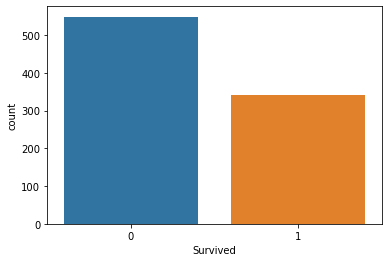

In [104]:
sns.countplot(
    data=train_data,
    x='Survived'
)

plt.show()

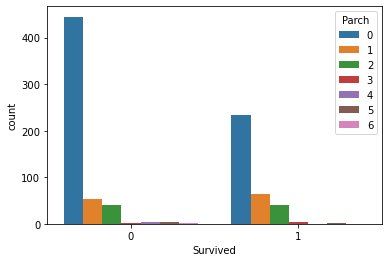

In [105]:
sns.countplot(
    data=train_data,
    x='Survived',
    hue='Parch'
)
plt.show()

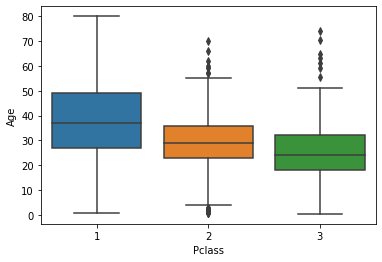

In [106]:
sns.boxplot(
    data=train_data,
    x='Pclass',
    y='Age'
)
plt.show()

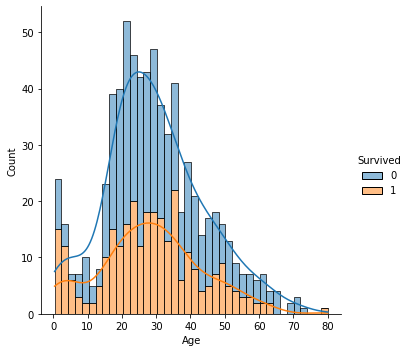

In [107]:
ax = sns.displot(
    data=train_data,
    x='Age',
    hue='Survived',
    multiple='stack',
    kind='hist',
    kde=True,
    bins=40
)

In [108]:
y = train_data['Survived']
passenger_id = test_data['PassengerId']
train_data.drop(['Survived'], inplace=True, axis=1)  # TODO

In [109]:
def process_data(data_):
    data_.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

    data_['Fare'].fillna(data_['Fare'].mean(), inplace=True)

    data_['Embarked'].fillna(data_['Embarked'].value_counts().index[0], inplace=True)

    conditions = [
    np.isnan(data_['Age']) & (data_['Pclass'] == 1),
    np.isnan(data_['Age']) & (data_['Pclass'] == 2),
    np.isnan(data_['Age']) & (data_['Pclass'] == 3)
    ]

    choices = [
        round(data_[data_['Pclass'] == 1]['Age'].mean()),
        round(data_[data_['Pclass'] == 2]['Age'].mean()),
        round(data_[data_['Pclass'] == 3]['Age'].mean())
    ]

    data_['Age'] = np.select(
        condlist=conditions,
        choicelist=choices,
        default=data_['Age']
    )

    data_ = pd.concat([
        pd.get_dummies(data_['Sex'], drop_first=True),
        pd.get_dummies(data_['Embarked']),
        pd.get_dummies(data_['Pclass'].astype(str)),
        # pd.get_dummies(data_['SibSp']),
        # pd.get_dummies(data_['Parch']),
        data_[['Age', 'Fare']]
    ], axis=1)

    return data_

train_data = process_data(train_data)
test_data = process_data(test_data)

print(train_data.info())
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    891 non-null    uint8  
 1   C       891 non-null    uint8  
 2   Q       891 non-null    uint8  
 3   S       891 non-null    uint8  
 4   1       891 non-null    uint8  
 5   2       891 non-null    uint8  
 6   3       891 non-null    uint8  
 7   Age     891 non-null    float64
 8   Fare    891 non-null    float64
dtypes: float64(2), uint8(7)
memory usage: 20.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    418 non-null    uint8  
 1   C       418 non-null    uint8  
 2   Q       418 non-null    uint8  
 3   S       418 non-null    uint8  
 4   1       418 non-null    uint8  
 5   2       418 non-null    uint8  
 6   3       418 non-null    uint

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.1)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
from sklearn.svm import SVC  # support vector classsifier
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))

ans = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": classifier.predict(test_data.values)
})
ans.to_csv('submission.csv', index=False)

0.8


In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))

0.7666666666666667


In [136]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))

0.8333333333333334
0.631578947368421


In [122]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))

0.8


In [123]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))


0.7666666666666667


In [124]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))


0.8


# CHOSEN MODEL

In [129]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, random_state=2)
classifier.fit(x_train, y_train)

print(accuracy_score(y_test, classifier.predict(x_test)))
print(accuracy_score(pd.read_csv('gender_submission.csv').iloc[:, 1], classifier.predict(test_data.values)))


ans = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": classifier.predict(test_data.values)
})
ans.to_csv('submission.csv', index=False)

0.7888888888888889
0.9019138755980861
